In [2]:
import os
print(os.getcwd())
os.chdir('../')
print(os.getcwd())

/Users/riley/Desktop/RAFTS/Notebooks
/Users/riley/Desktop/RAFTS


In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import astropy.units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time
from astropy.visualization import astropy_mpl_style

from utils import *

In [4]:
dcdf = pd.read_csv('ddf_flares.csv', index_col=0)
dcdf.head()

,field,candidate id,object id,object ra,object dec,object MJD,object filter,object magnitude,object magnitude error,object real/bogus score,exposure id,mean seeing,airmass,object datetime,parallactic angle
0,COSMOS,DC21jyeo,1244336,148.627940,1.020521,59360.983202,g,21.359,0.084,0.956,1107,1.116,1.24,2021-05-26 23:35:48.660576,151.108934
1,COSMOS,DC21jyeo,1244619,148.628248,1.020494,59360.984455,g,21.596,0.110,0.612,1108,1.115,1.24,2021-05-26 23:37:36.889536,150.563735
2,COSMOS,DC21jvtr,1231065,148.394095,1.407216,59358.011504,g,18.943,0.009,1.000,1059,1.169,1.31,2021-05-24 00:16:33.907584,143.250519
3,COSMOS,DC21jvtr,1232660,148.394358,1.407301,59358.012786,g,18.932,0.010,0.998,1060,1.185,1.31,2021-05-24 00:18:24.695712,142.810031
4,COSMOS,DC21jvtr,1233917,148.394618,1.407363,59358.014054,r,18.440,0.005,1.000,1061,0.985,1.32,2021-05-24 00:20:14.247456,142.380997


In [5]:
dcdf.shape

(5668, 15)

In [6]:
#Are all object IDs unique?
dcdf.shape[0] == dcdf['object id'].unique().shape[0]

True

In [7]:
#What fields are included?
dcdf['field'].unique()

array(['COSMOS', 'ELAIS'], dtype=object)

In [8]:
from IPython.display import display

for id in dcdf['candidate id'].unique()[0:5]:
    display(dcdf[dcdf['candidate id'] == id])

,field,candidate id,object id,object ra,object dec,object MJD,object filter,object magnitude,object magnitude error,object real/bogus score,exposure id,mean seeing,airmass,object datetime,parallactic angle
0,COSMOS,DC21jyeo,1244336,148.627940,1.020521,59360.983202,g,21.359,0.084,0.956,1107,1.116,1.24,2021-05-26 23:35:48.660576,151.108934
1,COSMOS,DC21jyeo,1244619,148.628248,1.020494,59360.984455,g,21.596,0.110,0.612,1108,1.115,1.24,2021-05-26 23:37:36.889536,150.563735


,field,candidate id,object id,object ra,object dec,object MJD,object filter,object magnitude,object magnitude error,object real/bogus score,exposure id,mean seeing,airmass,object datetime,parallactic angle
2,COSMOS,DC21jvtr,1231065,148.394095,1.407216,59358.011504,g,18.943,0.009,1.000,1059,1.169,1.31,2021-05-24 00:16:33.907584,143.250519
3,COSMOS,DC21jvtr,1232660,148.394358,1.407301,59358.012786,g,18.932,0.010,0.998,1060,1.185,1.31,2021-05-24 00:18:24.695712,142.810031
4,COSMOS,DC21jvtr,1233917,148.394618,1.407363,59358.014054,r,18.440,0.005,1.000,1061,0.985,1.32,2021-05-24 00:20:14.247456,142.380997


,field,candidate id,object id,object ra,object dec,object MJD,object filter,object magnitude,object magnitude error,object real/bogus score,exposure id,mean seeing,airmass,object datetime,parallactic angle
5,COSMOS,DC21bcfau,3089222,148.467440,1.392566,59369.995322,g,21.713,0.034,1.0,1421,0.946,1.38,2021-06-04 23:53:15.823392,138.092227
6,COSMOS,DC21bcfau,3089081,148.467843,1.392517,59369.996585,g,21.710,0.032,1.0,1422,0.917,1.39,2021-06-04 23:55:04.969920,137.736897
7,COSMOS,DC21bcfau,3094437,148.468223,1.392466,59369.997844,r,21.053,0.029,1.0,1423,0.934,1.40,2021-06-04 23:56:53.725920,137.388350


,field,candidate id,object id,object ra,object dec,object MJD,object filter,object magnitude,object magnitude error,object real/bogus score,exposure id,mean seeing,airmass,object datetime,parallactic angle
8,COSMOS,DC21fmml,10047388,148.914762,0.793344,59319.041709,i,21.204,0.037,1.0,2004,0.986,1.18,2021-04-15 01:00:03.620448,-177.819290
9,COSMOS,DC21fmml,587061,148.915011,0.793717,59319.051927,g,21.809,0.035,1.0,479,1.004,1.18,2021-04-15 01:14:46.485888,175.990510
10,COSMOS,DC21fmml,578186,148.915040,0.793784,59319.052961,r,21.278,0.024,1.0,480,0.879,1.18,2021-04-15 01:16:15.864096,175.367113
11,COSMOS,DC21fmml,583338,148.915315,0.794233,59319.064989,g,21.875,0.042,1.0,489,1.151,1.18,2021-04-15 01:33:35.015904,168.254825


,field,candidate id,object id,object ra,object dec,object MJD,object filter,object magnitude,object magnitude error,object real/bogus score,exposure id,mean seeing,airmass,object datetime,parallactic angle
12,COSMOS,DC21jrzg,1210241,148.952954,0.800502,59355.987286,g,21.120,0.060,0.872,1038,1.261,1.22,2021-05-21 23:41:41.501760,155.817126
13,COSMOS,DC21jrzg,1212223,148.953180,0.800468,59355.988541,g,21.156,0.061,0.909,1039,1.219,1.22,2021-05-21 23:43:29.910432,155.209016


Check how many COSMOS g-band objects per candidate:

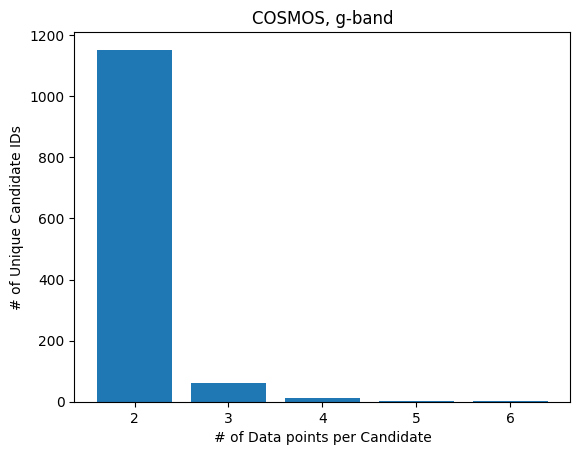

In [9]:
h = []

for i, id in enumerate(dcdf[dcdf['field'] == 'COSMOS']['candidate id'].unique()):
    h.append(len(dcdf[(dcdf['candidate id'] == id) & (dcdf['object filter'] == 'g')]))

labels, counts = np.unique(h, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('COSMOS, g-band')
plt.xlabel('# of Data points per Candidate')
plt.ylabel('# of Unique Candidate IDs');

Visualize flare coordinates

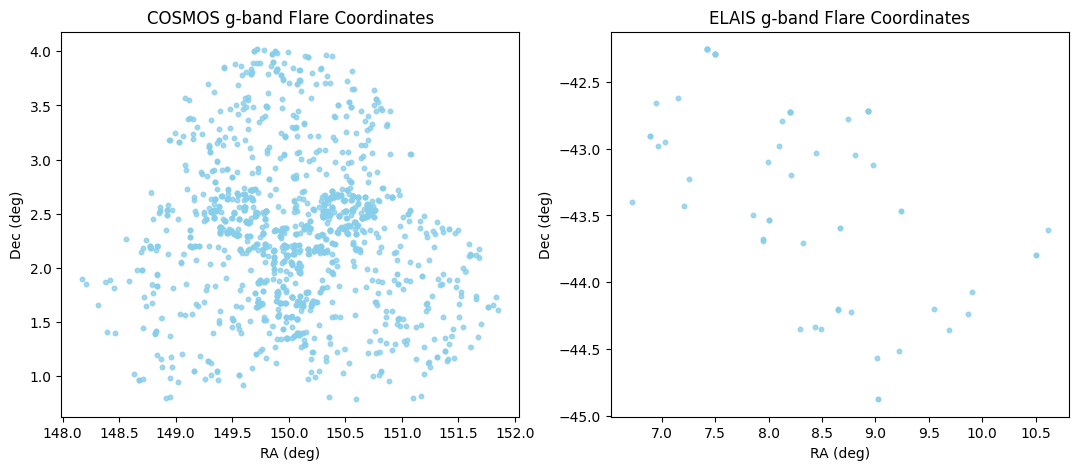

In [10]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

cgdf = dcdf[(dcdf['field']=='COSMOS') & (dcdf['object filter']=='g')]
egdf = dcdf[(dcdf['field']=='ELAIS') & (dcdf['object filter']=='g')]

ra1 = cgdf['object ra']
dec1 = cgdf['object dec']

ra2 = egdf['object ra']
dec2 = egdf['object dec']

ax[0].scatter(ra1, dec1, c='skyblue', alpha=0.5, s=10)
ax[0].set_xlabel('RA (deg)')
ax[0].set_ylabel('Dec (deg)')
ax[0].set_title('COSMOS g-band Flare Coordinates');

ax[1].scatter(ra2, dec2, c='skyblue', alpha=0.5, s=10)
ax[1].set_xlabel('RA (deg)')
ax[1].set_ylabel('Dec (deg)')
ax[1].set_title('ELAIS g-band Flare Coordinates');
plt.savefig('Figures/decam_coords.png', dpi=300, bbox_inches='tight')

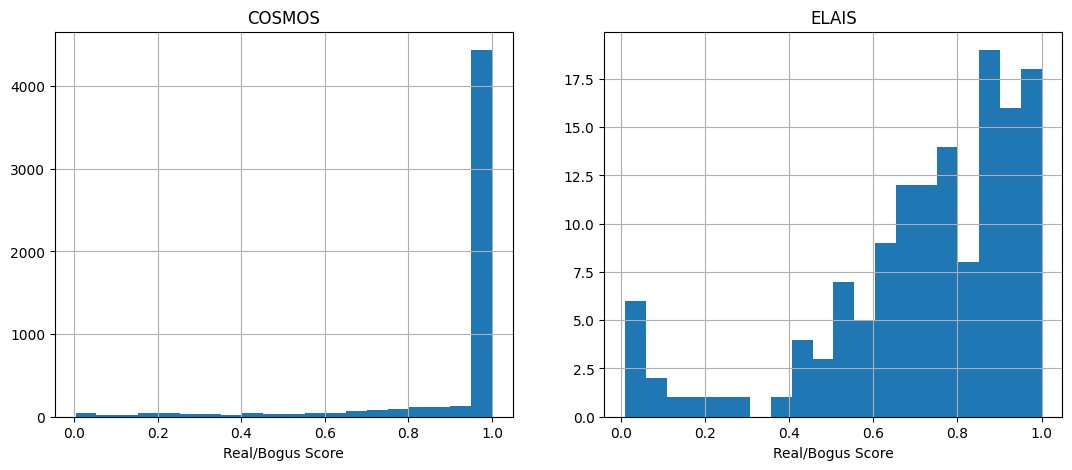

In [11]:
fig, ax = plt.subplots(1,2, figsize=(13,5))

dcdf[dcdf['field'] == 'COSMOS']['object real/bogus score'].hist(bins=20, ax=ax[0])
ax[0].set_xlabel('Real/Bogus Score')
ax[0].set_title('COSMOS')


dcdf[dcdf['field'] == 'ELAIS']['object real/bogus score'].hist(bins=20, ax=ax[1])
ax[1].set_xlabel('Real/Bogus Score')
ax[1].set_title('ELAIS')
plt.savefig('Figures/rbdist.png', dpi=300, bbox_inches='tight')

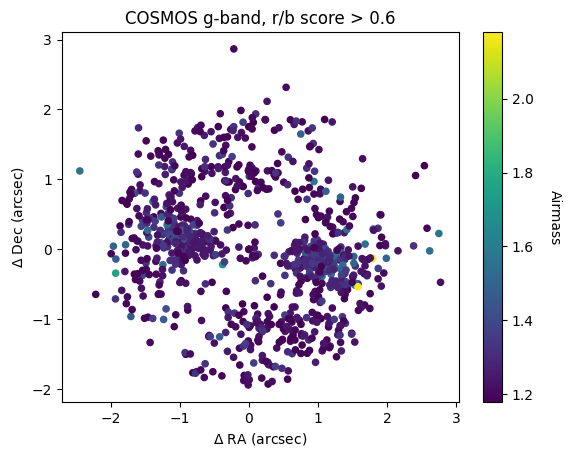

In [12]:
def dcoord(dcdf, field, thr, filt):

        d_ra = np.zeros_like(dcdf[dcdf['field'] == field]['candidate id'].unique())
        d_dec = np.zeros_like(dcdf[dcdf['field'] == field]['candidate id'].unique())
        d_am = np.zeros_like(dcdf[dcdf['field'] == field]['candidate id'].unique())
        
        for i,id in enumerate(dcdf[dcdf['field'] == field]['candidate id'].unique()):
                #print('Candidate ID: {}'.format(id))

                if np.isnan(dcdf.iloc[i]['airmass']):
                        continue

                subdf = dcdf[(dcdf['field'] == field) & (dcdf['object filter'] == filt) & 
                             (dcdf['object real/bogus score'] > thr) & (dcdf['candidate id'] == id)]

                if subdf.shape[0] == 2:

                        ra_i = subdf[subdf['object magnitude'] == subdf['object magnitude'].min()]['object ra'].values
                        dec_i = subdf[subdf['object magnitude'] == subdf['object magnitude'].min()]['object dec'].values
                        ra_f = subdf[subdf['object magnitude'] == subdf['object magnitude'].max()]['object ra'].values
                        dec_f = subdf[subdf['object magnitude'] == subdf['object magnitude'].max()]['object dec'].values
                        am_i = subdf[subdf['object magnitude'] == subdf['object magnitude'].min()]['airmass'].values
                        am_f = subdf[subdf['object magnitude'] == subdf['object magnitude'].max()]['airmass'].values
                     
                        dra = ra_f - ra_i
                        ddec = dec_f - dec_i

                        if dra.size > 0:
                                d_ra[i] = dra[0]

                        if ddec.size > 0:
                                d_dec[i] = ddec[0]

                        d_am[i] = np.mean([am_f, am_i])


                else:
                        d_ra[i] = np.nan
                        d_dec[i] = np.nan
                        d_am[i] = np.nan

        fig = plt.figure()
        ax = plt.axes()
        s = ax.scatter(d_ra*3600, d_dec*3600, c=d_am, s=20)
        ax.set_xlabel(r'$\Delta$ RA (arcsec)')
        ax.set_ylabel(r'$\Delta$ Dec (arcsec)')
        ax.set_title('{0} {1}-band, r/b score > {2}'.format(field,filt,thr))
        cbar = fig.colorbar(s)
        cbar.set_label('Airmass', rotation=270, labelpad=20)
        fig.savefig('Figures/{0}_rb{1}_deltacoord.png'.format(field, thr), dpi=300, bbox_inches='tight')
        return ax

_ = dcoord(dcdf, 'COSMOS', 0.6, 'g')

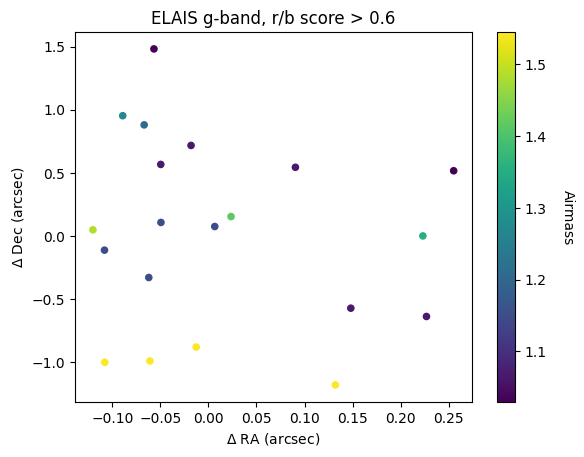

In [13]:
_ = dcoord(dcdf, 'ELAIS', 0.6, 'g')

Delta-magnitude histogram:

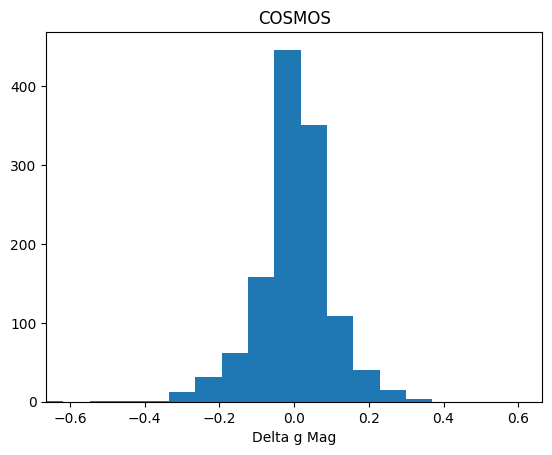

In [14]:
def dmag_hist(field, band, bins):

    h = []

    for i,id in enumerate(dcdf[dcdf['field'] == field]['candidate id'].unique()):

        subdf = dcdf[(dcdf['object filter'] == band) & (dcdf['candidate id'] == id)]

        if subdf.shape[0] > 1:
            
            h.append(subdf[subdf['object MJD'] == subdf['object MJD'].max()]['object magnitude'].values[0] - 
                    subdf[subdf['object MJD'] == subdf['object MJD'].min()]['object magnitude'].values[0])
    h = np.array(h)
    plt.hist(h, bins=bins);
    plt.xlim(-5*h.std(),5*h.std())
    plt.xlabel('Delta {} Mag'.format(band))
    plt.title(field)
    return h

h = dmag_hist('COSMOS', 'g', bins=50)


Delta-magnitude vs delta-time plot

257


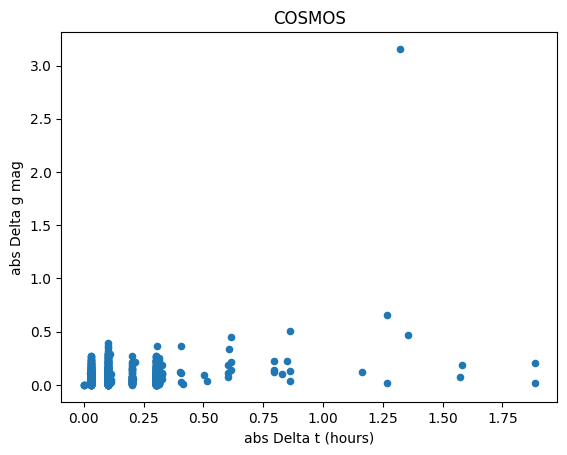

In [15]:
def dmag_plot(field, band):

    dmag = []
    dtime = []

    for i,id in enumerate(dcdf[dcdf['field'] == field]['candidate id'].unique()):

        subdf = dcdf[(dcdf['object filter'] == band) & (dcdf['candidate id'] == id)]

        if subdf.shape[0] > 1:
            
            dtime.append(subdf[subdf['object magnitude'] == subdf['object magnitude'].max()]['object MJD'].values[0] - 
                    subdf[subdf['object magnitude'] == subdf['object magnitude'].min()]['object MJD'].values[0])

            dmag.append(subdf['object magnitude'].max() - subdf['object magnitude'].min())
            
    dmag = np.array(np.abs(dmag))
    dtime = np.array(np.abs(dtime) * 24)
    
    print(np.where(dmag == dmag.max())[0][0])

    plt.scatter(dtime, dmag, s=20);
    #plt.ylim(0.5,-3.5)
    plt.ylabel('abs Delta {} mag'.format(band))
    plt.xlabel('abs Delta t (hours)')
    plt.title(field)
    return dmag, dtime
dmag, dtime = dmag_plot('COSMOS', 'g');

Lightcurve plot:

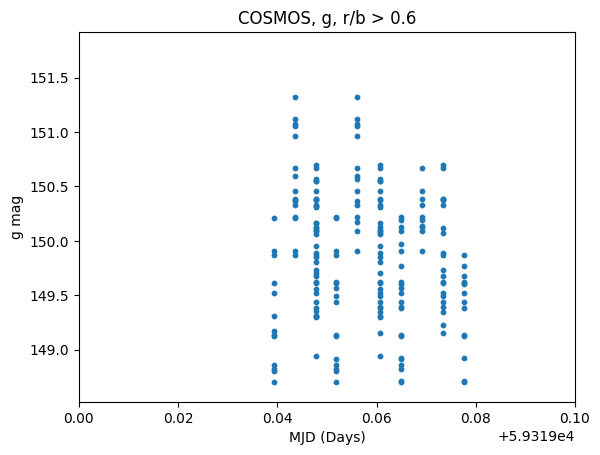

In [16]:
def dc_lcv(df, field, filt, rb_thr, maxtime):  
    subdf = df[(df['field']==field) & (df['object filter']==filt) & (df['object real/bogus score'] > rb_thr) & (df['object MJD'] < maxtime)]

    plt.scatter(subdf['object MJD'].values, subdf['object ra'].values, s=10)

    plt.ylabel('{} mag'.format(filt))
    plt.xlabel('MJD (Days)')
    plt.title('{0}, {1}, r/b > {2}'.format(field,filt,rb_thr))
    plt.xlim(59319, 59319.1)

dc_lcv(dcdf, 'COSMOS', 'g', 0.6, 59325)

^^ bin into indiv exposures, find median ra dec in each time bin, assign subfield ID



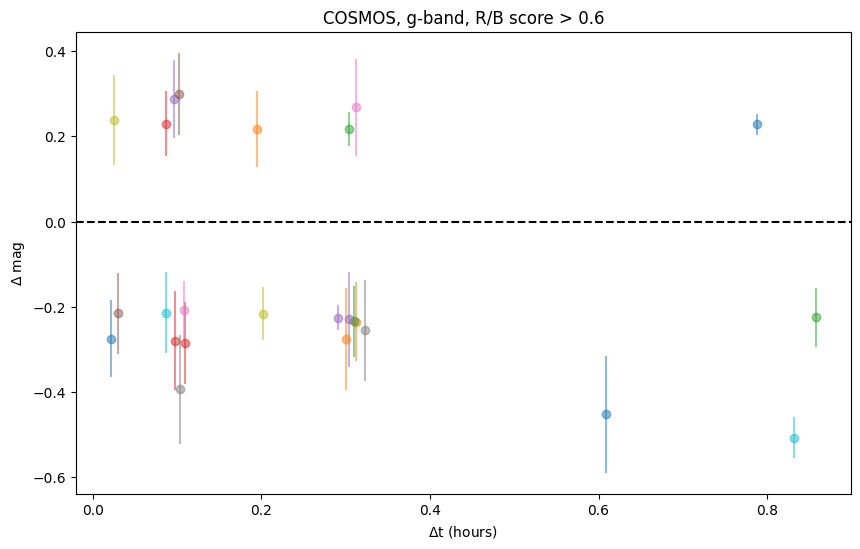

In [17]:
import warnings
warnings.filterwarnings("ignore")

def dmdt(df, field, rb_thr, filt):

        plt.figure(figsize=(10,6))
        
        for id in df[df['field'] == field]['candidate id'].unique():

                subdf = df[(df['field'] == field) & (df['object filter'] == filt) & 
                             (df['object real/bogus score'] > rb_thr) & (df['candidate id'] == id)]

                if subdf.shape[0] > 1:
                        dmag = np.sqrt((subdf['object magnitude error'].values[1:]) ** 2 
                                     + (subdf['object magnitude error'].values[:-1]) ** 2)

                        mdiff = np.diff(subdf['object magnitude'])
                        indx = ((np.abs(mdiff) - 2 * dmag) < 0) | (np.abs(mdiff) < 0.2)
                        mdiff[indx] = np.nan
                        tdiff = np.diff(subdf['object MJD']) * 24 + np.random.normal(0.0, 0.01, 
                                np.diff(subdf['object MJD']).shape)

                        if not np.isnan(mdiff).all():
                                plt.errorbar(tdiff, mdiff, yerr=dmag, marker='o', ls='none', alpha=0.5, label=id)

        plt.axhline(0, color='k', ls='--')
        #plt.xlim(0,0.4)
        plt.xlabel(r'$\Delta$t (hours)')
        plt.ylabel(r'$\Delta$ mag')
        plt.title('{0}, {1}-band, R/B score > {2}'.format(field, filt, rb_thr))
        #plt.legend(fontsize=8)
        plt.savefig('Figures/dmdt.png', dpi=300, bbox_inches='tight')

dmdt(dcdf, 'COSMOS', 0.6, 'g');

Text(0.5, 0, 'Airmass')

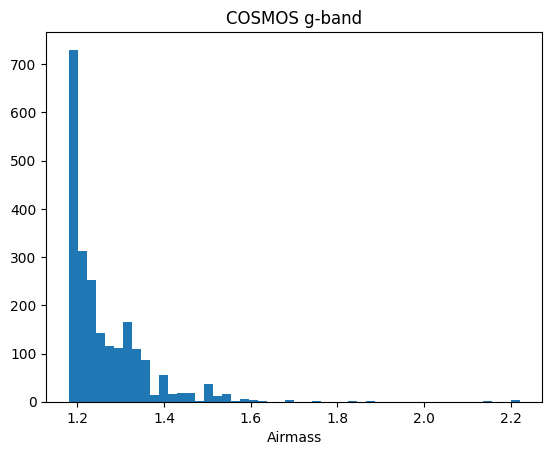

In [18]:
df = dcdf
field= 'COSMOS'
filt = 'g'
rb_thr = 0.6

subdf = df[(df['field'] == field) & (df['object filter'] == filt) & 
            (df['object real/bogus score'] > rb_thr)]

plt.hist(subdf['airmass'], bins=50)
plt.title('COSMOS g-band')
plt.xlabel('Airmass')

## Delta plots

In [19]:
def scatter_hist(x, y, c, ax, ax_histx, ax_histy, ax_cbar, title, s=50):
        # no labels
        ax_histx.tick_params(axis="x", labelbottom=False)
        ax_histy.tick_params(axis="y", labelleft=False)

        # the scatter plot:
        s = ax.scatter(x, y, c=c, s=s, cmap='coolwarm', clim=[-np.max(abs(c)), np.max(abs(c))], alpha=0.75)

        # now determine nice limits by hand:
        xbinwidth = np.nanstd(x) * 0.5
        ybinwidth = np.nanstd(y) * 0.5
        xmax = np.nanmax(np.abs(x))
        ymax = np.nanmax(np.abs(y))
        xlim = (int(xmax/xbinwidth) + 1) * xbinwidth
        ylim = (int(ymax/ybinwidth) + 1) * ybinwidth

        xbins = np.arange(-xlim, xlim + xbinwidth, xbinwidth)
        ybins = np.arange(-ylim, ylim + ybinwidth, ybinwidth)
        ax_histx.hist(x, bins=xbins)
        ax_histy.hist(y, bins=ybins, orientation='horizontal')

        cbar = fig.colorbar(s, cax=ax_cbar)
        cbar.set_label(r'{}'.format(title), rotation=270, labelpad=20)

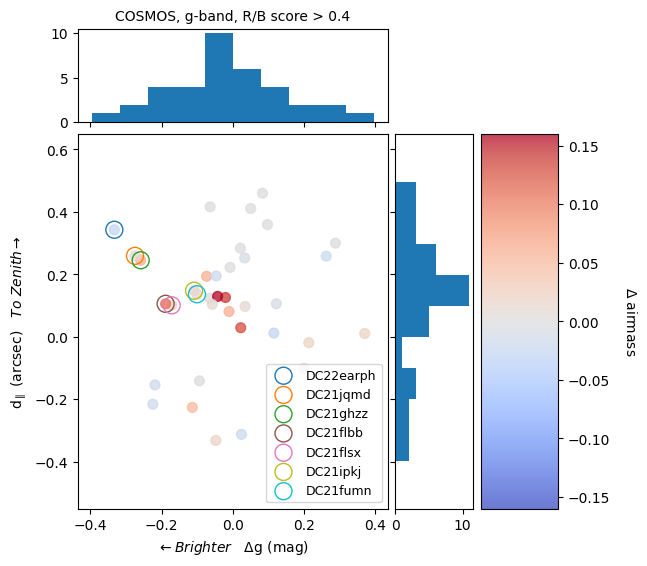

In [20]:
def dmdd(df, field, rb_thr, max_sep, filt):
        #define gridspec
        fig = plt.figure(figsize=(6,6))
        gs = fig.add_gridspec(2, 3,  width_ratios=(4,1,1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
        #define axes
        ax = fig.add_subplot(gs[1, 0])
        ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
        ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
        ax_cbar = fig.add_subplot(gs[1, 2])

        dtan_arr = []
        dpar_arr = []
        dam_arr = []
        dmag_arr = []
        am_only_shifts = []
        ids = []

        w_eff_sun = lamb_eff_BB(band='g', temp=4000.0) #solar temp BB
    
        #loop through unique ids with right field, filter, rb threshold
        for id in df[df['field'] == field]['candidate id'].unique():
                
                subdf = df[(df['object filter'] == filt) & (df['object real/bogus score'] > rb_thr) & (df['candidate id'] == id)]
                subdf = subdf.where((subdf['object magnitude'] == subdf['object magnitude'].min()) | (subdf['object magnitude'] == subdf['object magnitude'].max())).dropna()

                if subdf.shape[0] > 1:

                        if np.sqrt(np.diff(subdf['object ra'].values)[0] ** 2 + np.diff(subdf['object dec'].values)[0] ** 2) < max_sep.to(u.deg).value:

                                dmag = np.diff(subdf['object magnitude'])
                                dmag_arr.append(dmag)
                                pa2 = subdf['parallactic angle'].values[-1]
                                dra = np.diff(subdf['object ra'])
                                ddec = np.diff(subdf['object dec'])
                                dam = np.diff(subdf['airmass'])
                                ids.append(id)

                                # d = scalar projection along PA
                                dpar = np.sqrt(dra**2 + ddec**2) * np.cos((np.pi/2) - np.deg2rad(pa2) - np.arctan(ddec/dra))
                                dtan = np.sqrt(dra**2 + ddec**2) * np.sin((np.pi/2) - np.deg2rad(pa2) - np.arctan(ddec/dra))
                                dpar_arr.append(dpar)
                                dtan_arr.append(dtan)
                                dam_arr.append(dam)
                                
                                am_only_shift = dcr_offset(w_eff_sun, airmass = subdf['airmass'].values[-1]) - dcr_offset(w_eff_sun, airmass = subdf['airmass'].values[0])
                                am_only_shifts.append(am_only_shift)


        dtan_arr = np.concatenate(dtan_arr)
        dpar_arr = np.concatenate(dpar_arr)
        dam_arr = np.concatenate(dam_arr)
        dmag_arr = np.concatenate(dmag_arr)
        ids = np.array(ids)

        #send arrays and axes to scatter_hist func
        scatter_hist(dmag_arr, dpar_arr * 3600, dam_arr, ax, ax_histx, ax_histy, ax_cbar, title='$\Delta$ airmass')
        #add markers
        #ax.scatter(0, np.mean(dpar_arr*3600), marker='x', color='green', label='mean d')
        #ax.errorbar(0, np.mean(am_only_shifts), yerr = np.std(am_only_shifts), fmt='x', color='red', label='mean d (AM only)')
        colors = plt.get_cmap('tab10')
        for i, dmag in enumerate(np.sort(dmag_arr)[:10]):
                if dpar_arr[dmag_arr == dmag] > 0:
                        ax.scatter(dmag, dpar_arr[dmag_arr == dmag] * 3600, edgecolors=colors(i), facecolor='none', marker='o', s=150, label='{}'.format(ids[dmag_arr == dmag][0]))

        #add lines
        #ax.axhline(0, color='k', ls='--', alpha=0.75)
        #ax.axvline(0, color='k', ls='--', alpha=0.75)
        #ax_histy.axhline(np.mean(dpar_arr * 3600), color='green')
        #ax_histy.axhline(np.mean(am_only_shifts), color='red')
        
        #no grids
        ax.grid(False)
        ax_histx.grid(False)
        ax_histy.grid(False)
        
        #tick params
        ax.tick_params(axis='both', labelsize=10)
        ax_histx.tick_params(axis='both', labelsize=10)
        ax_histy.tick_params(axis='both', labelsize=10)
        
        #labels
        ax.set_ylabel(r'd$_{\parallel}$ (arcsec)$\quad To$ $Zenith\rightarrow$')
        ax.set_xlabel(r'$\leftarrow Brighter\quad\Delta$g (mag)')
        ax_histx.set_title('{0}, {1}-band, R/B score > {2}'.format(field, filt, rb_thr), fontsize=10)
        ax.legend(fontsize=9)
        
        plt.savefig('Figures/dmdd.png', dpi=300, bbox_inches='tight')

        return dpar_arr, dtan_arr, dmag_arr, dam_arr, ids

dpar, dtan, dmag, dam, ids = dmdd(dcdf, field='COSMOS', rb_thr = 0.4, max_sep = 0.5 * u.arcsec, filt = 'g');

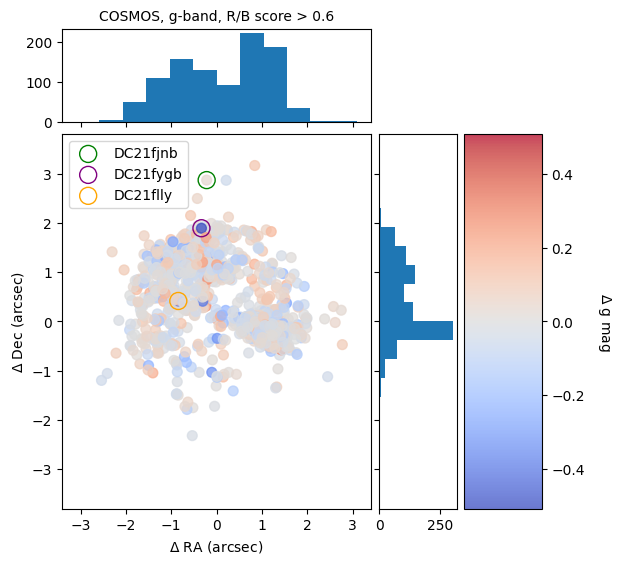

In [21]:
def draddec(df, field, rb_thr, filt):
        #define gridspec
        fig = plt.figure(figsize=(6,6))
        gs = fig.add_gridspec(2, 3,  width_ratios=(4,1,1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
        #define axes
        ax = fig.add_subplot(gs[1, 0])
        ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
        ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
        ax_cbar = fig.add_subplot(gs[1, 2])

        dtan_arr = []
        dpar_arr = []
        dra_arr = []
        ddec_arr = []
        dam_arr = []
        dmag_arr = []
        am_only_shifts = []

        w_eff_sun = lamb_eff_BB(band='g', temp=4000.0) #solar temp BB
    
        #loop through unique ids with right field, filter, rb threshold
        for id in df[df['field'] == field]['candidate id'].unique():

                subdf = df[(df['object filter'] == filt) & (df['object real/bogus score'] > rb_thr) & (df['candidate id'] == id)]
                subdf = subdf.where((subdf['object magnitude'] == subdf['object magnitude'].min()) | (subdf['object magnitude'] == subdf['object magnitude'].max())).dropna()

                if subdf.shape[0] > 1:

                        dmag = np.diff(subdf['object magnitude'])
                        dmag_arr.append(dmag)
                        pa2 = subdf['parallactic angle'].values[-1]
                        dra = np.diff(subdf['object ra'])
                        ddec = np.diff(subdf['object dec'])
                        dam = np.diff(subdf['airmass'])

                        # d = scalar projection along PA
                        dpar = np.sqrt(dra**2 + ddec**2) * np.cos((np.pi/2) - np.deg2rad(pa2) - np.arctan(ddec/dra))
                        dtan = np.sqrt(dra**2 + ddec**2) * np.sin((np.pi/2) - np.deg2rad(pa2) - np.arctan(ddec/dra))
                        dpar_arr.append(dpar)
                        dtan_arr.append(dtan)
                        ddec_arr.append(ddec)
                        dra_arr.append(dra)
                        dam_arr.append(dam)
                     
                        am_only_shift = dcr_offset(w_eff_sun, airmass = subdf['airmass'].values[-1]) - dcr_offset(w_eff_sun, airmass = subdf['airmass'].values[0])
                        am_only_shifts.append(am_only_shift)


        dtan_arr = np.concatenate(dtan_arr)
        dpar_arr = np.concatenate(dpar_arr)
        ddec_arr = np.concatenate(ddec_arr)
        dra_arr = np.concatenate(dra_arr)
        dam_arr = np.concatenate(dam_arr)
        dmag_arr = np.concatenate(dmag_arr)
        
        #send arrays and axes to scatter_hist func
        scatter_hist(dra_arr * 3600, ddec_arr * 3600, dmag_arr, ax, ax_histx, ax_histy, ax_cbar, title='$\Delta$ g mag')
        
        #add markers
        #ax.scatter(0, np.mean(dpar_arr*3600), marker='x', color='green', s=80, label='mean d')
        #ax.errorbar(0, np.mean(am_only_shifts), yerr = np.std(am_only_shifts), fmt='x', color='red', label='mean d (AM only)')
        ax.scatter(dra_arr[dpar_arr == dpar_arr.max()] * 3600, ddec_arr[dpar_arr == dpar_arr.max()] * 3600, 
                   facecolor='none', color='green', marker='o', s=150, label='DC21fjnb')
        ax.scatter(dra_arr[dmag_arr == np.sort(dmag_arr)[0]] * 3600, ddec_arr[dmag_arr == np.sort(dmag_arr)[0]] * 3600, 
                   facecolor='none', color='purple', marker='o', s=150, label='DC21fygb')
        ax.scatter(dra_arr[dmag_arr == np.sort(dmag_arr)[1]] * 3600, ddec_arr[dmag_arr == np.sort(dmag_arr)[1]] * 3600, 
                   facecolor='none', color='orange', marker='o', s=150, label='DC21flly')

        #add lines
        #ax.axhline(0, color='k', ls='--', alpha=0.75)
        #ax.axvline(0, color='k', ls='--', alpha=0.75)
        #ax_histy.axhline(np.mean(dpar_arr * 3600), color='green')
        #ax_histy.axhline(np.mean(am_only_shifts), color='red')
        
        #no grids
        ax.grid(False)
        ax_histx.grid(False)
        ax_histy.grid(False)
        
        #tick params
        ax.tick_params(axis='both', labelsize=10)
        ax_histx.tick_params(axis='both', labelsize=10)
        ax_histy.tick_params(axis='both', labelsize=10)
        
        #labels
        ax.set_xlabel(r'$\Delta$ RA (arcsec)')
        ax.set_ylabel(r'$\Delta$ Dec (arcsec)')

        ax_histx.set_title('{0}, {1}-band, R/B score > {2}'.format(field, filt, rb_thr), fontsize=10)
        ax.legend(fontsize=10)
        
        plt.savefig('Figures/draddec.png', dpi=300, bbox_inches='tight')

        return dra_arr, ddec_arr, dmag_arr, dam_arr

dpar, dtan, dmag, dam = draddec(dcdf, 'COSMOS', 0.6, 'g');

In [22]:
c1center = SkyCoord(ra = '10h00m00s', dec = '+03d06m00s')
c2center = SkyCoord(ra = '9h56m53s', dec = '+01d45m00s')
c3center = SkyCoord(ra = '10h03m07s', dec = '+01d45m00s')

dc21fjnb_1 = SkyCoord(ra = dcdf[dcdf['candidate id'] == 'DC21fjnb'][dcdf['object filter'] == 'g']['object ra'].values[0] * u.deg,
                      dec = dcdf[dcdf['candidate id'] == 'DC21fjnb'][dcdf['object filter'] == 'g']['object dec'].values[0] * u.deg, 
                      obstime = Time(dcdf[dcdf['candidate id'] == 'DC21fjnb'][dcdf['object filter'] == 'g']['object MJD'].iloc[0], format='mjd'))

dc21fjnb_2 = SkyCoord(ra = dcdf[dcdf['candidate id'] == 'DC21fjnb'][dcdf['object filter'] == 'g']['object ra'].values[-1] * u.deg,
                      dec = dcdf[dcdf['candidate id'] == 'DC21fjnb'][dcdf['object filter'] == 'g']['object dec'].values[-1] * u.deg,
                      obstime = Time(dcdf[dcdf['candidate id'] == 'DC21fjnb'][dcdf['object filter'] == 'g']['object MJD'].iloc[-1], format='mjd'))

dc21flly_1 = SkyCoord(ra = dcdf[dcdf['candidate id'] == 'DC21flly'][dcdf['object filter'] == 'g']['object ra'].values[0] * u.deg,
                      dec = dcdf[dcdf['candidate id'] == 'DC21flly'][dcdf['object filter'] == 'g']['object dec'].values[0] * u.deg,
                      obstime = Time(dcdf[dcdf['candidate id'] == 'DC21flly'][dcdf['object filter'] == 'g']['object MJD'].iloc[0], format='mjd'))

dc21flly_2 = SkyCoord(ra = dcdf[dcdf['candidate id'] == 'DC21flly'][dcdf['object filter'] == 'g']['object ra'].values[-1] * u.deg,
                      dec = dcdf[dcdf['candidate id'] == 'DC21flly'][dcdf['object filter'] == 'g']['object dec'].values[-1] * u.deg,
                      obstime = Time(dcdf[dcdf['candidate id'] == 'DC21flly'][dcdf['object filter'] == 'g']['object MJD'].iloc[-1], format='mjd'))

dc21fygb_1 = SkyCoord(ra = dcdf[dcdf['candidate id'] == 'DC21fygb'][dcdf['object filter'] == 'g']['object ra'].values[0] * u.deg,
                      dec = dcdf[dcdf['candidate id'] == 'DC21fygb'][dcdf['object filter'] == 'g']['object dec'].values[0] * u.deg,
                      obstime = Time(dcdf[dcdf['candidate id'] == 'DC21fygb'][dcdf['object filter'] == 'g']['object MJD'].iloc[0], format='mjd'))

dc21fygb_2 = SkyCoord(ra = dcdf[dcdf['candidate id'] == 'DC21fygb'][dcdf['object filter'] == 'g']['object ra'].values[-1] * u.deg,
                      dec = dcdf[dcdf['candidate id'] == 'DC21fygb'][dcdf['object filter'] == 'g']['object dec'].values[-1] * u.deg,
                      obstime = Time(dcdf[dcdf['candidate id'] == 'DC21fygb'][dcdf['object filter'] == 'g']['object MJD'].iloc[-1], format='mjd'))

print('Epoch 1')
print('Dist to COSMOS-1 center: {0:.5f}'.format(dc21fjnb_1.separation(c1center)))
print('Dist to COSMOS-2 center: {0:.5f}'.format(dc21fjnb_1.separation(c2center)))
print('Dist to COSMOS-3 center: {0:.5f}'.format(dc21fjnb_1.separation(c2center)))
print('Epoch 2')
print('Dist to COSMOS-1 center: {0:.5f}'.format(dc21fjnb_2.separation(c1center)))
print('Dist to COSMOS-2 center: {0:.5f}'.format(dc21fjnb_2.separation(c2center)))
print('Dist to COSMOS-3 center: {0:.5f}'.format(dc21fjnb_2.separation(c2center)))

Epoch 1
Dist to COSMOS-1 center: 0.55005 deg
Dist to COSMOS-2 center: 1.50479 deg
Dist to COSMOS-3 center: 1.50479 deg
Epoch 2
Dist to COSMOS-1 center: 0.54944 deg
Dist to COSMOS-2 center: 1.50525 deg
Dist to COSMOS-3 center: 1.50525 deg


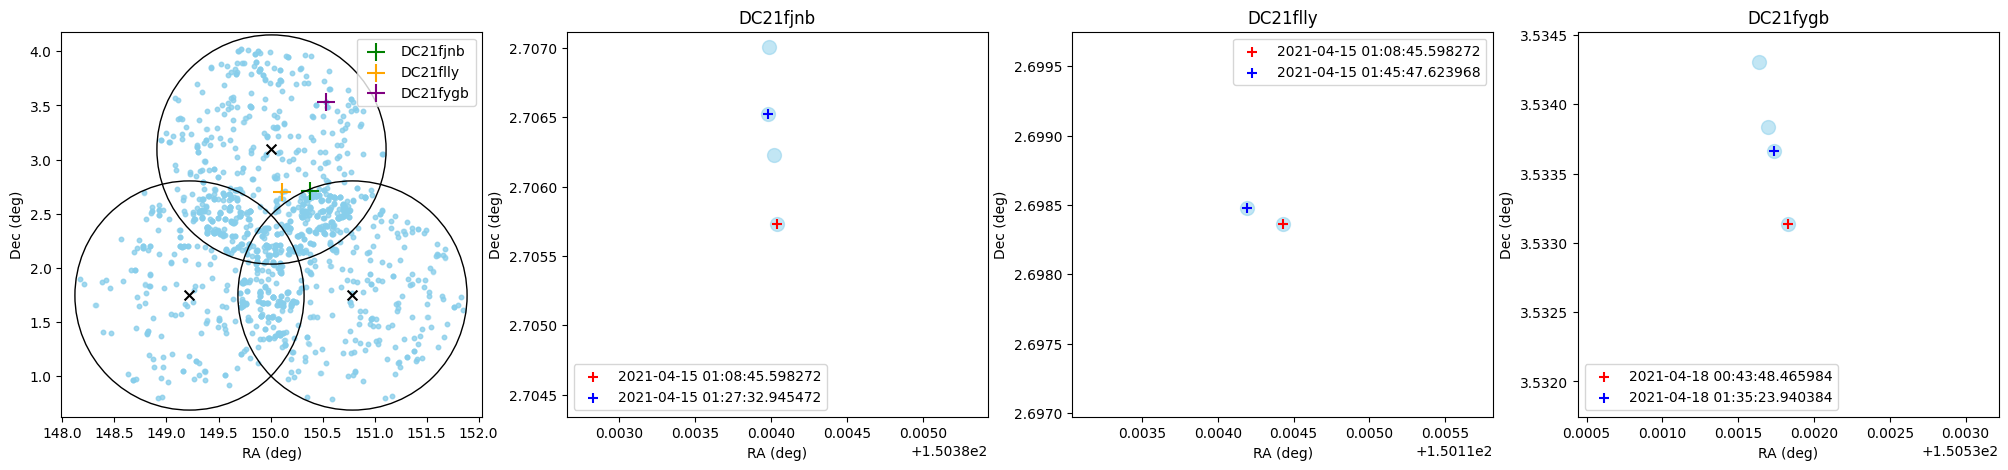

In [23]:
fig, ax = plt.subplots(1,4, figsize=(25,5))

cgdf = dcdf[(dcdf['field']=='COSMOS') & (dcdf['object filter']=='g')]

ra = cgdf['object ra']
dec = cgdf['object dec']

ax[0].scatter(ra, dec, c='skyblue', alpha=0.5, s=10)
ax[0].scatter(dc21fjnb_1.ra, dc21fjnb_1.dec, color='green', s=150, marker='+', label='DC21fjnb')
ax[0].scatter(dc21flly_1.ra, dc21flly_1.dec, color='orange', s=150, marker='+', label='DC21flly')
ax[0].scatter(dc21fygb_1.ra, dc21fygb_1.dec, color='purple', s=150, marker='+', label='DC21fygb')
ax[0].scatter(c1center.ra, c1center.dec, color='k', s=50, marker='x')
ax[0].scatter(c2center.ra, c2center.dec, color='k', s=50, marker='x')
ax[0].scatter(c3center.ra, c3center.dec, color='k', s=50, marker='x')
ax[0].plot(c1center.ra, c1center.dec, 'o', color='k', ms=165, mfc='None')
ax[0].plot(c2center.ra, c2center.dec, 'o', color='k', ms=165, mfc='None')
ax[0].plot(c3center.ra, c3center.dec, 'o', color='k', ms=165, mfc='None')

ax[0].set_xlabel('RA (deg)')
ax[0].set_ylabel('Dec (deg)')
ax[0].legend()

ax[1].scatter(ra, dec, c='skyblue', alpha=0.5, s=100)
ax[1].scatter(dc21fjnb_1.ra, dc21fjnb_1.dec, color='red', s=50, marker='+', label='{}'.format(dc21fjnb_1.obstime.to_datetime()))
ax[1].scatter(dc21fjnb_2.ra, dc21fjnb_2.dec, color='blue', s=50, marker='+', label='{}'.format(dc21fjnb_2.obstime.to_datetime()))
ax[1].set_xlim(dc21fjnb_1.ra.value-(5/3600), dc21fjnb_1.ra.value+(5/3600))
ax[1].set_ylim(dc21fjnb_1.dec.value-(5/3600), dc21fjnb_1.dec.value+(5/3600))
ax[1].set_title('DC21fjnb')
ax[1].set_xlabel('RA (deg)')
ax[1].set_ylabel('Dec (deg)')
ax[1].legend()

ax[2].scatter(ra, dec, c='skyblue', alpha=0.5, s=100)
ax[2].scatter(dc21flly_1.ra, dc21flly_1.dec, color='red', s=50, marker='+', label='{}'.format(dc21flly_1.obstime.to_datetime()))
ax[2].scatter(dc21flly_2.ra, dc21flly_2.dec, color='blue', s=50, marker='+', label='{}'.format(dc21flly_2.obstime.to_datetime()))
ax[2].set_xlim(dc21flly_1.ra.value-(5/3600), dc21flly_1.ra.value+(5/3600))
ax[2].set_ylim(dc21flly_1.dec.value-(5/3600), dc21flly_1.dec.value+(5/3600))
ax[2].set_title('DC21flly')
ax[2].set_xlabel('RA (deg)')
ax[2].set_ylabel('Dec (deg)')
ax[2].legend()

ax[3].scatter(ra, dec, c='skyblue', alpha=0.5, s=100)
ax[3].scatter(dc21fygb_1.ra, dc21fygb_1.dec, color='red', s=50, marker='+', label='{}'.format(dc21fygb_1.obstime.to_datetime()))
ax[3].scatter(dc21fygb_2.ra, dc21fygb_2.dec, color='blue', s=50, marker='+', label='{}'.format(dc21fygb_2.obstime.to_datetime()))
ax[3].set_xlim(dc21fygb_1.ra.value-(5/3600), dc21fygb_1.ra.value+(5/3600))
ax[3].set_ylim(dc21fygb_1.dec.value-(5/3600), dc21fygb_1.dec.value+(5/3600))
ax[3].set_title('DC21fygb')
ax[3].set_xlabel('RA (deg)')
ax[3].set_ylabel('Dec (deg)')
ax[3].legend()


# Gaia Sample

In [24]:
!pip install astroquery


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [25]:
from astroquery.gaia import Gaia
Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"
Gaia.ROW_LIMIT = -1
cosmos_1 = SkyCoord(ra='10:00:00', dec='+03:06:00', unit=(u.hourangle, u.deg), frame='icrs')
cosmos_2 = SkyCoord(ra='09:56:53', dec='+01:45:00', unit=(u.hourangle, u.deg), frame='icrs')
cosmos_3 = SkyCoord(ra='10:03:7', dec = '+01:45:00', unit=(u.hourangle, u.deg), frame='icrs')

j1 = Gaia.cone_search_async(cosmos_1, radius=u.Quantity(1.1, u.deg))
r1 = j1.get_results()

j2 = Gaia.cone_search_async(cosmos_2, radius=u.Quantity(1.1, u.deg))
r2 = j2.get_results()

j3 = Gaia.cone_search_async(cosmos_3, radius=u.Quantity(1.1, u.deg))
r3 = j3.get_results()

gaiac1df = r1.to_pandas()
gaiac2df = r2.to_pandas()
gaiac3df = r3.to_pandas()

gaiacdf = pd.concat([gaiac1df,gaiac2df,gaiac3df]).drop_duplicates(subset='source_id') #drop duplicates from overlapping fields

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


In [26]:
print(gaiacdf.shape)
gaiacdf.head()

(37268, 153)


,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,dist
0,1636148068921376768,Gaia DR3 3836464732400110720,3836464732400110720,978720248,2016.0,150.003254,1.133064,3.108611,1.320879,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.009205
1,1636148068921376768,Gaia DR3 3836465488314433792,3836465488314433792,1194742996,2016.0,149.992958,8.799581,3.110842,8.593011,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.012930
2,1636148068921376768,Gaia DR3 3836464629320617600,3836464629320617600,1108494384,2016.0,150.005012,6.310019,3.086398,5.154025,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.014486
3,1636148068921376768,Gaia DR3 3836458822524758912,3836458822524758912,1275386085,2016.0,149.986555,15.065448,3.092451,26.125767,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.015405
4,1636148068921376768,Gaia DR3 3836458818230056576,3836458818230056576,906495062,2016.0,149.986293,0.524260,3.092427,0.552590,2.569988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.015645


In [27]:
gaiacdf['phot_G_mean_mag'] = gaiacdf['phot_g_mean_mag'] + 5 * np.log10(gaiacdf['parallax']) - 10 #Calc abs G mag

In [28]:
dcdf_cosmos_cands = dcdf[(dcdf['field'] == 'COSMOS')].groupby('candidate id').mean().reset_index()
gaiacdf_dm = gaiacdf[(gaiacdf['phot_G_mean_mag'] > 5) * (gaiacdf['bp_rp'] > 2) * (gaiacdf['parallax_error'] < 1.0)] #gaia mag, color cut

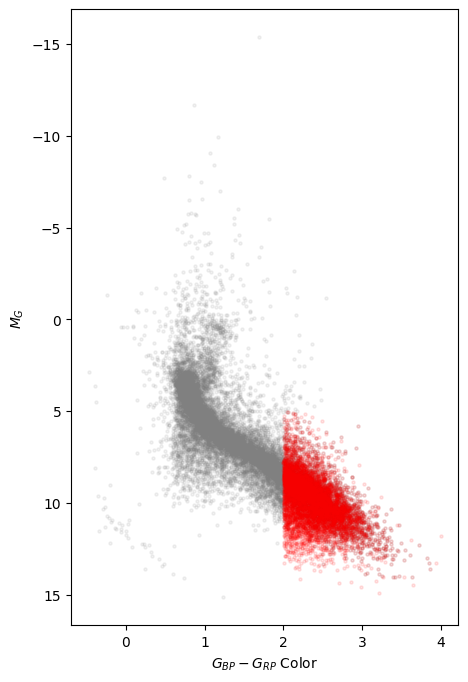

In [29]:
plt.figure(figsize=(5,8))
plt.scatter(gaiacdf[(gaiacdf['parallax_error'] < 0.5)]['bp_rp'], gaiacdf[(gaiacdf['parallax_error'] < 0.5)]['phot_G_mean_mag'], c='grey', alpha=0.1, s=5)
plt.scatter(gaiacdf_dm['bp_rp'], gaiacdf_dm['phot_G_mean_mag'], c='red', alpha=0.1, s=5)
plt.gca().invert_yaxis()
plt.ylabel(r'$M_{G}$')
plt.xlabel(r'$G_{BP}-G_{RP}$ Color');

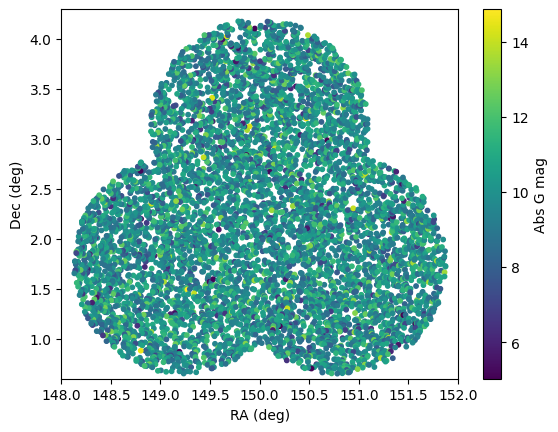

In [30]:
plt.style.use('default')
plt.scatter(gaiacdf_dm['ra'], gaiacdf_dm['dec'], cmap='viridis', c=gaiacdf_dm['phot_G_mean_mag'], s=10)
plt.xlim(148, 152)
plt.ylim(0.6, 4.3)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
cbar = plt.colorbar()
cbar.set_label('Abs G mag')

In [31]:
gaiacdf_dm.shape

(6993, 154)

In [32]:
#Crossmatching
c_decam = SkyCoord(ra = dcdf_cosmos_cands['object ra'] * u.deg, dec = dcdf_cosmos_cands['object dec'] * u.deg)
c_gaia = SkyCoord(ra = gaiacdf_dm['ra'] * u.deg, dec = gaiacdf_dm['dec'] * u.deg)

max_sep = 1.0 * u.arcsec #crossmatch 2D distance limit
idx, d2d, d3d = c_gaia.match_to_catalog_3d(c_decam)
sep_constraint = d2d < max_sep

In [33]:
decam_x_gaia = dcdf_cosmos_cands.iloc[idx[sep_constraint]]
decam_x_gaia

,candidate id,object id,object ra,object dec,object MJD,object magnitude,object magnitude error,object real/bogus score,exposure id,mean seeing,airmass,parallactic angle
269,DC21engi,454446.666667,151.678532,2.169514,59313.108136,22.771,0.103667,0.854667,412.333333,1.413,1.216667,158.677333


In [34]:
gaia_x_decam = gaiacdf_dm[sep_constraint]
gaia_x_decam['candidate id'] = decam_x_gaia['candidate id'].values
gaia_x_decam[['candidate id', 'source_id', 'ra', 'dec', 'ra_error', 'dec_error', 'bp_rp', 'phot_g_mean_mag', 'phot_G_mean_mag']]

,candidate id,source_id,ra,dec,ra_error,dec_error,bp_rp,phot_g_mean_mag,phot_G_mean_mag
12076,DC21engi,3835368381867901952,151.678528,2.169523,0.792422,0.935786,2.023827,20.331047,10.315423


In [35]:
dcdf_dc21engi = dcdf[dcdf['candidate id'] == 'DC21engi']
dcdf_dc21engi

,field,candidate id,object id,object ra,object dec,object MJD,object filter,object magnitude,object magnitude error,object real/bogus score,exposure id,mean seeing,airmass,object datetime,parallactic angle
3977,COSMOS,DC21engi,441110,151.678533,2.169509,59313.099347,g,22.617,0.111,0.573,406,1.891,1.20,2021-04-09 02:23:03.576480,163.086813
3978,COSMOS,DC21engi,457478,151.678564,2.169518,59313.112015,g,22.987,0.115,1.000,415,1.240,1.22,2021-04-09 02:41:18.079584,156.717751
3979,COSMOS,DC21engi,464752,151.678498,2.169516,59313.113045,r,22.709,0.085,0.991,416,1.108,1.23,2021-04-09 02:42:47.113920,156.227436


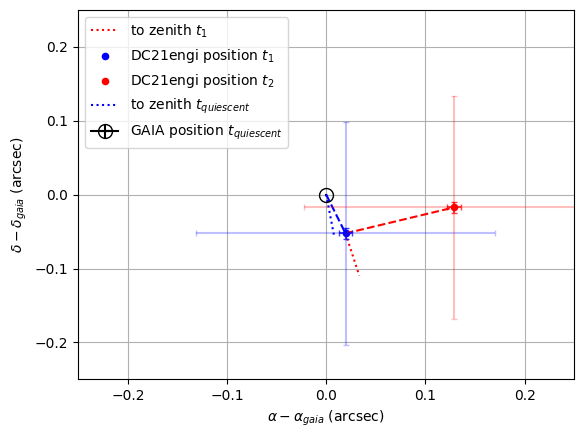

In [42]:
def event_schematic(candidate):

        x0 = gaia_x_decam[gaia_x_decam['candidate id'] == candidate]['ra'].values[0] * 3600
        y0 = gaia_x_decam[gaia_x_decam['candidate id'] == candidate]['dec'].values[0] * 3600
        pa0 = celest_to_pa(x0 / 3600, y0 / 3600, time=Time('2021-04-09T02:00:00'), loc=EarthLocation.of_site('Cerro Tololo'))

        x1 = dcdf[(dcdf['candidate id'] == candidate) * (dcdf['object filter'] == 'g')]['object ra'].iloc[0] * 3600
        y1 = dcdf[(dcdf['candidate id'] == candidate) * (dcdf['object filter'] == 'g')]['object dec'].iloc[0] * 3600
        pa1 = dcdf[(dcdf['candidate id'] == candidate) * (dcdf['object filter'] == 'g')]['parallactic angle'].iloc[0]


        x2 = dcdf[(dcdf['candidate id'] == candidate) * (dcdf['object filter'] == 'g')]['object ra'].iloc[1] * 3600
        y2 = dcdf[(dcdf['candidate id'] == candidate) * (dcdf['object filter'] == 'g')]['object dec'].iloc[1] * 3600
        pa2 = dcdf[(dcdf['candidate id'] == candidate) * (dcdf['object filter'] == 'g')]['parallactic angle'].iloc[1]

        def rotMatrix(theta):
                return np.array([[np.cos(theta), -np.sin(theta)], 
                                [np.sin(theta),  np.cos(theta)]])

        plt.plot([0,x1-x0], [0,y1-y0], c='blue', ls='--')
        plt.plot([x1-x0,x2-x0], [y1-y0,y2-y0], c='red', ls='--')

        plt.errorbar([0, np.array([0,np.sqrt((x1-x0) ** 2 + (y1-y0)**2)]).dot(rotMatrix(np.deg2rad(pa0)))[0]], 
                [0, np.array([0,np.sqrt((x1-x0) ** 2 + (y1-y0) ** 2)]).dot(rotMatrix(np.deg2rad(pa0)))[1]], 
                c='blue', ls=':', label=r'to zenith $t_{quiescent}$')

        plt.plot([x1-x0,np.array([0,np.sqrt((x2-x1) ** 2 + (y2-y1)**2)]).dot(rotMatrix(np.deg2rad(pa1)))[0]], 
                [y1-y0,np.array([0,np.sqrt((x2-x1) ** 2 + (y2-y1) ** 2)]).dot(rotMatrix(np.deg2rad(pa1)))[1]], 
                c='red', ls=':', label=r'to zenith $t_1$')
        
        plt.errorbar(x1-x0, y1-y0, xerr=0.151, yerr=0.151, c='blue', alpha=0.25, capsize=2, ls='none')
        plt.errorbar(x2-x0, y2-y0, xerr=0.151, yerr=0.151, c='red', alpha=0.25, capsize=2, ls='none')

        plt.errorbar(x1-x0, y1-y0, xerr=0.007, yerr=0.007, c='blue', alpha=0.75, capsize=2, ls='none')
        plt.errorbar(x2-x0, y2-y0, xerr=0.007, yerr=0.007, c='red', alpha=0.75, capsize=2, ls='none')

        plt.errorbar(0,0,xerr = gaia_x_decam[gaia_x_decam['candidate id'] == candidate]['ra_error'] / 1000, 
                        yerr = gaia_x_decam[gaia_x_decam['candidate id'] == candidate]['dec_error'] / 1000, 
                        c='black', markersize=10, markeredgecolor='black', markerfacecolor='none', marker='o', label=r'GAIA position $t_{quiescent}$')

        plt.scatter(x1-x0, y1-y0, s=20, color='blue', label=r'DC21engi position $t_1$')
        plt.scatter(x2-x0, y2-y0, s=20, color='red', label=r'DC21engi position $t_2$')

        #plt.vlines([-0.05, 0.05+0.2637], -0.2637/2, 0.2637/2, color='k', ls='--', label='DECAM pixel size')
        #plt.vlines([-0.05, 0.05+0.2637], -0.2637/2, 0.2637/2, color='k', ls='--')
        #plt.hlines([-0.2637/2, 0.2637/2], -0.05, 0.05+0.2637, color='k', ls='--')
        #plt.hlines([-0.2637/2, 0.2637/2], -0.05, 0.05+0.2637, color='k', ls='--')

        plt.xlabel(r'$\alpha - \alpha_{gaia}$ (arcsec)')
        plt.ylabel(r'$\delta - \delta_{gaia}$ (arcsec)')
        plt.xlim(-0.25,0.25)
        plt.ylim(-0.25,0.25)
        plt.legend(loc=2)
        plt.grid()

event_schematic('DC21engi')
plt.savefig('Figures/eventschematic.png', dpi=300, bbox_inches='tight')

### Try generating a fake flare dataset:

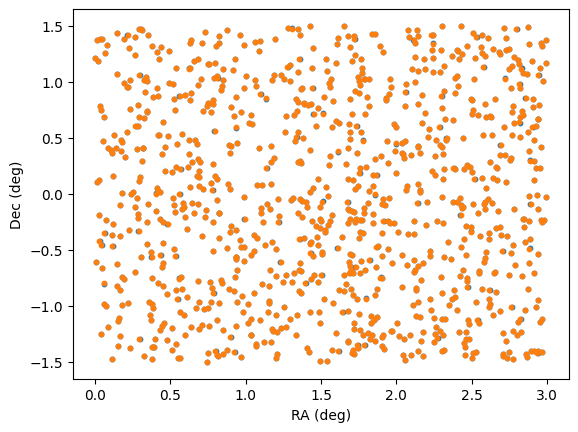

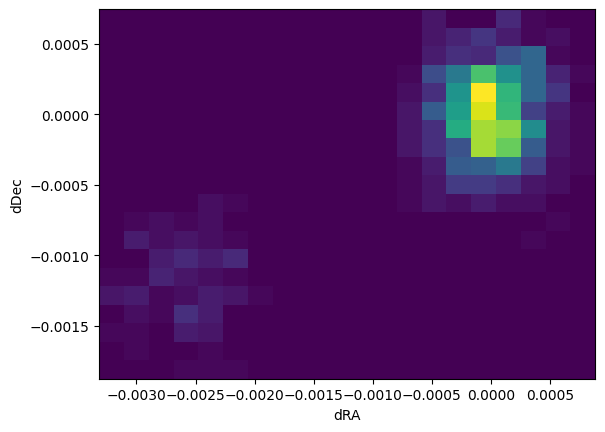

3.207321614577212


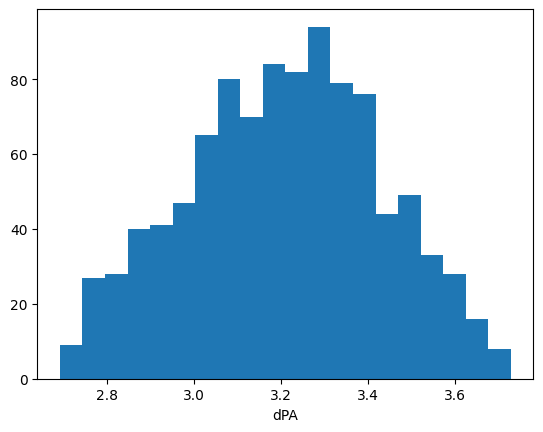

0.00014274508522380978


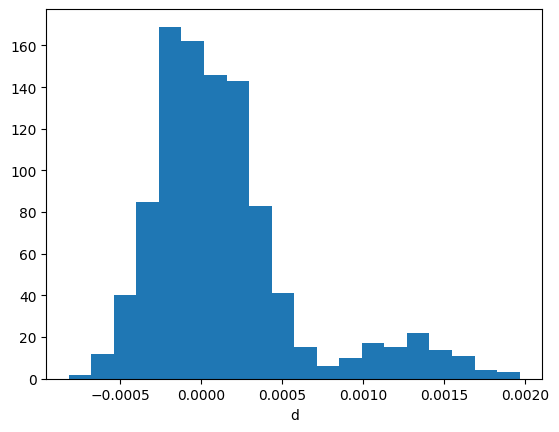

In [30]:
np.random.seed(111)

nstars = 1000
nflares = 100
narr = []
t1 = Time(59295.0, format='mjd')
t2 = Time(59295.0 + (1/24), format = 'mjd') 
site = EarthLocation.of_site('Cerro Tololo')

dec1 = np.random.uniform(-1.5,1.5,nstars)
ra1 = np.random.uniform(0,3,nstars)
flux1 = np.random.normal(20, 0.4, nstars)

ra2 = ra1 + np.random.normal(0,(1/3600),nstars)
dec2 = dec1 + np.random.normal(0,(1/3600),nstars)
flux2 = flux1 + np.random.normal(0,0.1,nstars)
#keep above in notebook^^^^
#Make function of below:
pa1 = celest_to_pa(ra1, dec1, t1, site)
pa2 = celest_to_pa(ra2, dec2, t2, site)
approx_pa = np.mean([pa1.mean(), pa2.mean()])

#flare deltas
for n in np.random.choice(range(nstars), nflares, replace=False):
    ra2[n] += (10/3600) * np.cos(approx_pa)
    dec2[n] += (10/3600) * np.sin(approx_pa)
    flux2[n] -= 0.5
    narr.append(n)

dra = ra2 - ra1
ddec = dec2 - dec1
dpa = pa2 - pa1

d = np.sqrt(dra**2 + ddec**2) * np.cos(90 - approx_pa + np.arctan(ddec/dra)) # scalar projection along PA

plt.scatter(ra1,dec1,s=10)
plt.scatter(ra2,dec2,s=10)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.show()

plt.hist2d(ra2 - ra1, dec2 - dec1, bins=20)
plt.xlabel('dRA')
plt.ylabel('dDec')
plt.show()

plt.hist(dpa, bins=20)
plt.xlabel('dPA')
print(dpa.mean())
plt.show()

plt.hist(d, bins=20)
plt.xlabel('d')
print(d.mean())

TypeError: scatter_hist() missing 3 required positional arguments: 'ax_histy', 'ax_cbar', and 'title'

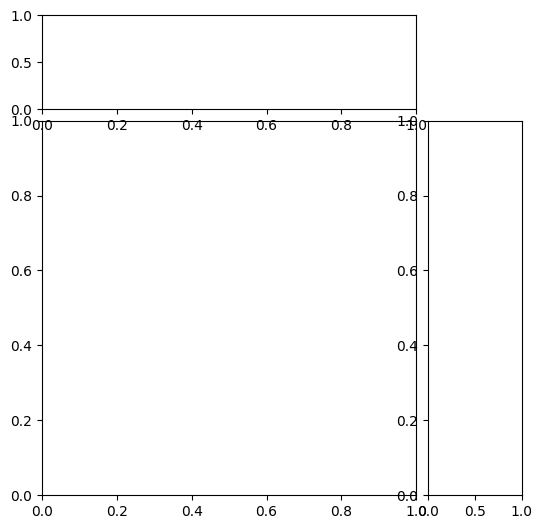

In [31]:
fig = plt.figure(figsize=(6,6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                left=0.1, right=0.9, bottom=0.1, top=0.9,
                wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

mdiff_arr = flux2 - flux1
xdiff_arr = d

scatter_hist(mdiff_arr, xdiff_arr, ax, ax_histx, ax_histy)

ax.axhline(0, color='k', ls='--', alpha=0.5)
ax.axvline(0, color='k', ls='--', alpha=0.5)

ax.grid(False)
ax_histx.grid(False)
ax_histy.grid(False)

ax.tick_params(axis='both', labelsize=10)
ax_histx.tick_params(axis='both', labelsize=10)
ax_histy.tick_params(axis='both', labelsize=10)

ax.set_ylabel(r'd (deg)$\quad Bluer\rightarrow$')
ax.set_xlabel(r'$\leftarrow Brighter\quad\Delta$g (mag)')
ax_histx.set_title('{0}/{1} flare fraction'.format(nflares,nstars));

In [ ]:
for i,time in enumerate(np.arange(dcdf['object MJD'].min(), dcdf['object MJD'].min()+120,20)):
    print(time)
    alts = []
    for t in np.arange(-12,12,1):

        alt = SkyCoord(ra=10.008366666666667, dec=2.210777777777778, unit=(u.hour,u.deg)).transform_to(
        AltAz(obstime=Time(np.floor(time) + t/24, format='mjd'), location=EarthLocation.of_site('Cerro Tololo'))).alt.value
        alts.append(alt)
    plt.plot(np.arange(-12,12,1), alts, label='night={}'.format(0+20*i))
    plt.title('COSMOS altitude')
    plt.ylabel('Alt (deg)')
    plt.xlabel('Hours from midnight')
    plt.legend(fontsize=9)

In [ ]:
slope_thresh = 0.2 / 0.5  #-0.2 magnitude change over 1/2 hour

In [ ]:
def dcoord2(df, field, rb_thr, s_thr, filt):

        """
        Creates delta-RA vs. delta-dec plot, comparing pairs of epochs with the most negative
        dmag/dt slope for each candidate ID. 

        Parameters
        ----------
        df : pandas dataframe
                input dataframe

        field : str
                DECAM field ('ELAIS' or 'COSMOS')

        rb_thr : float
                real/bogus score threshold. No candidate with a R/B 
                score below rb_thr will be plotted

        s_thr : float
                dmag/dt threshold

        filt : str
                DECAM filter
        """

        d_ra = np.zeros_like(df[df['field'] == field]['candidate id'].unique())
        d_dec = np.zeros_like(df[df['field'] == field]['candidate id'].unique())
        d_am = np.zeros_like(df[df['field'] == field]['candidate id'].unique())
        slopes = np.zeros_like(df[df['field'] == field]['candidate id'].unique())

        for i,id in enumerate(df[df['field'] == field]['candidate id'].unique()):

                subdf = df[(df['field'] == field) & (df['object filter'] == filt) & 
                             (df['object real/bogus score'] > rb_thr) & (df['candidate id'] == id)]

                if subdf.shape[0] > 1:
                        slope = np.diff(subdf['object magnitude'].values) / np.diff(subdf['object MJD'].values * 24)
                        high_rate = np.where((np.abs(slope) > s_thr) & (np.abs(slope) == np.abs(slope).max()))[0]

                        if len(high_rate) > 0:
                                slopes[i] = slope[high_rate][0]
                                d_ra[i] = subdf['object ra'].values[high_rate + 1] - subdf['object ra'].values[high_rate]
                                d_dec[i] = subdf['object dec'].values[high_rate + 1] - subdf['object dec'].values[high_rate]
                                d_am[i] = np.mean([subdf['airmass'].values[high_rate + 1], subdf['airmass'].values[high_rate]])
                        else:   
                                slopes[i] = np.nan
                                d_ra[i] = np.nan
                                d_dec[i] = np.nan
                                d_am[i] = np.nan
                else:
                        slopes[i] = np.nan
                        d_ra[i] = np.nan
                        d_dec[i] = np.nan
                        d_am[i] = np.nan

        pltslopes = (slopes.astype(float) * -1) * 40  #change sign, dtype and scale for plotting
        x = d_ra * 3600
        y = d_dec * 3600
        
        fig = plt.figure(figsize=(12,8))
        ax = plt.axes()
        s = ax.scatter(x, y, c=d_am, s=pltslopes, alpha=0.5)
        xabs_max = abs(np.nanmax(ax.get_xlim()))
        yabs_max = abs(np.nanmax(ax.get_ylim()))
        ax.set_xlim(-xabs_max, xabs_max)
        ax.set_ylim(-yabs_max , yabs_max)
        ax.set_xlabel(r'$\Delta$ RA (arcsec)')
        ax.set_ylabel(r'$\Delta$ Dec (arcsec)')
        ax.set_title('{0} {1}-band, r/b score > {2}, |dmag/dt| > {3:0.2f} mags/hr'.format(field, filt, rb_thr, s_thr))
        cbar = fig.colorbar(s)
        cbar.set_label('(Mean) Airmass', rotation=270, labelpad=20)
        plt.savefig('Figures/dcoord2.png', dpi=500, bbox_inches='tight')

dcoord2(dcdf, 'COSMOS', rb_thr=0.6, s_thr=slope_thresh, filt='g')

In [ ]:
def makeGaussian(size, fwhm = 3, center=None):
    """ Make a square gaussian kernel.

    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """

    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)

p1 = makeGaussian(50, fwhm=4, center=(25,25)) + np.random.randn(50,50) * 0.01
p2 = makeGaussian(50, fwhm=4, center=(25,25.25)) + np.random.randn(50,50) * 0.01

fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].imshow(p1)
ax[1].imshow(p2)
diff = ax[2].imshow(p2-p1)
fig.colorbar(diff, ax=ax[2])

In [ ]:
np.random.seed(343)
shifts = np.arange(0.01,1.01,0.05) #parallactic shifts in arcsec, 0.27 arcsec/pixel

FWHM = 4
cen= 25
sig = 0.05

for shift in shifts:

    npos = 0
    nneg = 0
    fpos = 0
    fneg = 0

    sci = makeGaussian(51, fwhm=FWHM, center=(cen,cen - shift / 0.27)) + np.random.randn(51,51) * sig
    ref = makeGaussian(51, fwhm=FWHM, center=(cen,cen)) + np.random.randn(51,51) * sig * 0.1 # noise in ref img should be ~1/10 that in sci img

    diff = sci - ref

    fig, ax = plt.subplots(1,3, figsize=(15,5))

    for i in range(cen - 2 * FWHM, cen + 2 * FWHM):
        for j in range(cen - 2 * FWHM, cen + 2 * FWHM):

            if diff[i,j] > 2 * sig:
                #ax[2].scatter(j,i,s=10, color='red', marker='+')
                npos += 1
                fpos += diff[i,j]

            if diff[i,j] < -2 * sig:
                #ax[2].scatter(j,i,s=10, color='blue', marker='+')
                nneg += 1
                fneg += np.abs(diff[i,j])

    sciplt = ax[0].imshow(sci)
    refplt = ax[1].imshow(ref)
    diffplt = ax[2].imshow(diff)

    ax[0].set_title('SCI')
    ax[1].set_title('REF')
    ax[2].set_title('DIFF')
    ax[0].set_xlabel('Sep = {0:.2f} arcsec'.format(shift))

    fig.colorbar(sciplt)
    fig.colorbar(refplt)
    fig.colorbar(diffplt)

    if (nneg > npos * 0.5) or (fneg > fpos * 0.5):
        ax[2].set_title('DIFF (REJECTED)')

